# Wrangling Data with Pandas

## Series and DataFrame
###Series
Think of this as one column of your data - one data type.

### DataFrame
All of the columns in your data. Mixed data types.


#Reading data from disk

In [1]:
import pandas as pd
exam_data = pd.read_csv('data/PISA2009_Scored_Tests_MEX.csv')
bio_data = pd.read_csv('data/PISA2009_Questionnaire_MEX.csv')


##Support for many formats
CSV, Excel, HDF5, SQL Tables...

Blah blah

In [2]:
useless = {
    u' Version of cognitive database and date of release',
    u'3-character country code ',
    u'Adjudicated sub-region',
}

not_questions = {u'Booklet', 
                 u'School ID 5-digit', 
                 u'Student ID 5-digit',
                 u'OECD country',
                 u'Country code ISO 3-digit',}

score_mapping = {
    'Score 0': 0,
    'Score 1': 1,
    'Score 2': 2,
    'Not reached': 0,
}

questions = set(exam_data.columns) - not_questions - useless

for question in questions:
    exam_data[question] = exam_data[question].map(score_mapping)

In [3]:
math_qs = {q for q in questions if q.startswith('MATH')}
read_qs = {q for q in questions if q.startswith('READ')}
scie_qs = {q for q in questions if q.startswith('SCIE')}
    
totals = exam_data[list(questions)].sum(axis=1)
math_score = exam_data[list(math_qs)].sum(axis=1)
read_score = exam_data[list(read_qs)].sum(axis=1)
scie_score = exam_data[list(scie_qs)].sum(axis=1)

In [4]:
score_df = pd.DataFrame({'Total Score': totals, 
                         'Math Score': math_score, 
                         'Reading Score': read_score, 
                         'Science Score': scie_score,
                         'Student ID 5-digit': exam_data['Student ID 5-digit']})

In [5]:
data = pd.merge(score_df, bio_data, on='Student ID 5-digit')


In [6]:
data['Reading Enjoyment Time'].value_counts()

30 minutes or less a day      16997
I don�t read for enjoyment     9071
Between 30 and 60 minutes      7047
1 to 2 hours a day             3772
More than 2 hours a day        1008
dtype: int64

#Plotting tools

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###Jupyter notebooks can display graphics inline

#Matplotlib

- The historical go-to for plotting
- allows lots of fine-grained control
- built with numpy in mind

#Seaborn

- Expressive power
- built with pandas in mind

We will mainly use seaborn examples in this presentation

In [8]:
import seaborn as sns

#Scatterplot

View relationship between two continuous variables

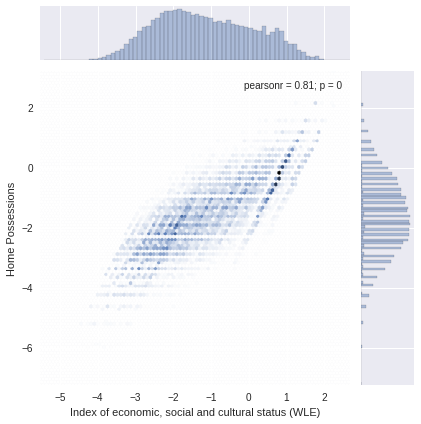

In [9]:
sns.jointplot(data['Index of economic, social and cultural status (WLE)'], 
              data['Home Possessions'], kind="hex")

In this dataset, several variables can stand as proxies for socio-economic status

# Histogram


- Visualize distribution of continuous data.


- Visualize distribution across categorical levels.

- Can plot two histograms on top of each other

- See the effects of the variable on the target

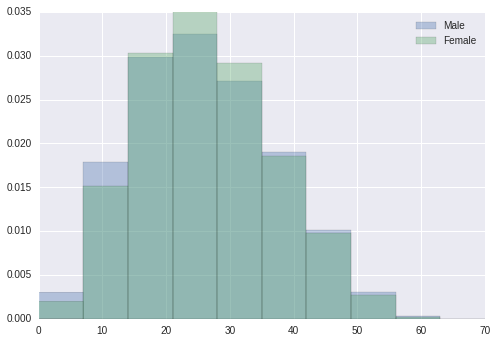

In [10]:
groups = data.groupby('Sex').groups
for key, row_ids in groups.iteritems():
    pylab.hist(data['Total Score'][row_ids].values,
               normed=True,
               bins=np.linspace(0, 70, 11),
               alpha=0.35,
               label=str(key))
pylab.legend()

###Doesn't work as well for more than two levels

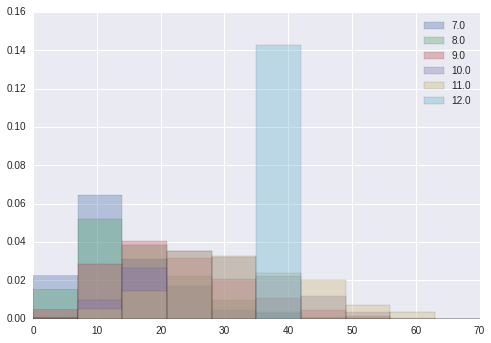

In [11]:
groups = data.groupby('Grade').groups
for key, row_ids in groups.iteritems():
    pylab.hist(data['Total Score'][row_ids].values,
               normed=True,
               bins=np.linspace(0, 70, 11),
               alpha=0.35,
               label=str(key))
pylab.legend()

## Violin Plots work better for comparing several distributions

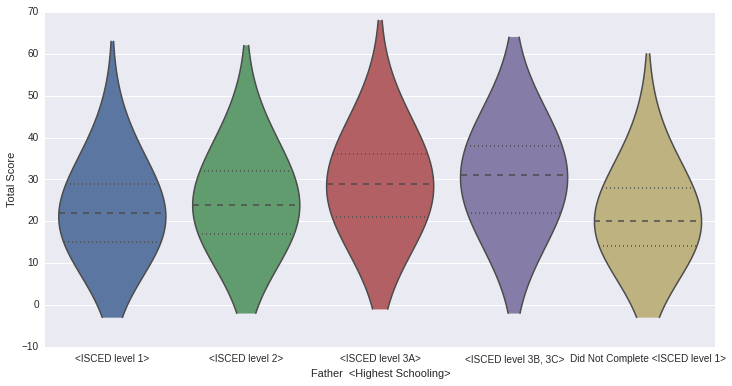

In [12]:
nonnull_subset = data['Total Score'].notnull()
plt.figure(figsize=(12, 6))
sns.violinplot(data['Total Score'][nonnull_subset], 
               data['Father  <Highest Schooling>'][nonnull_subset], 
               inner='box',
               bw=1)

##Alternatively, use `FacetGrid`
###Visualize more effect of two variables

/home/dallin/.virtualenvs/pisa/local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:198: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


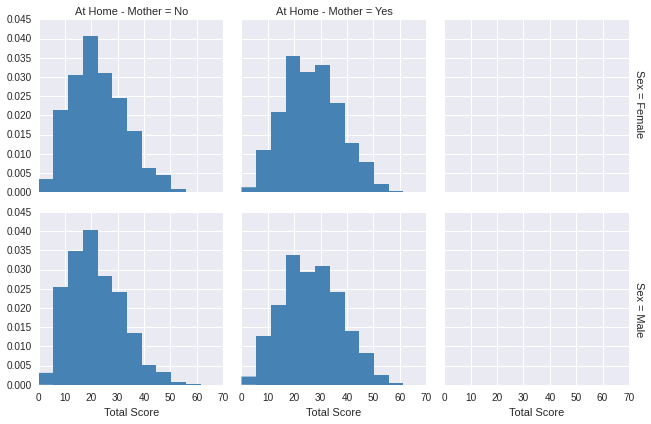

In [13]:
g = sns.FacetGrid(data, row="Sex", col="At Home - Mother", margin_titles=True)
bins = np.linspace(0, 67, 13)
g.map(plt.hist, "Total Score", color="steelblue", bins=bins, lw=0, normed=True)

###If distribution not required, try factor plot

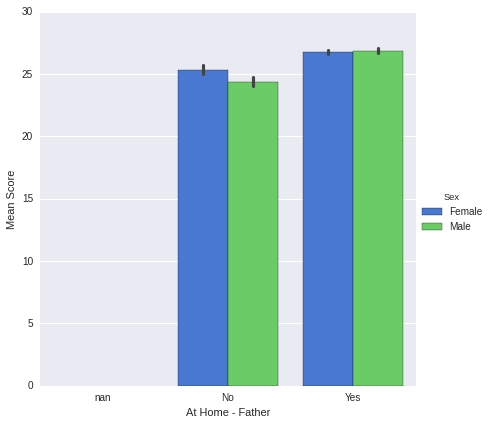

In [14]:
g = sns.factorplot("At Home - Father", "Total Score", "Sex",
                    data=data, kind="bar",
                    size=6, palette="muted", dropna=True)
g.despine(left=True)
g.set_ylabels("Mean Score")

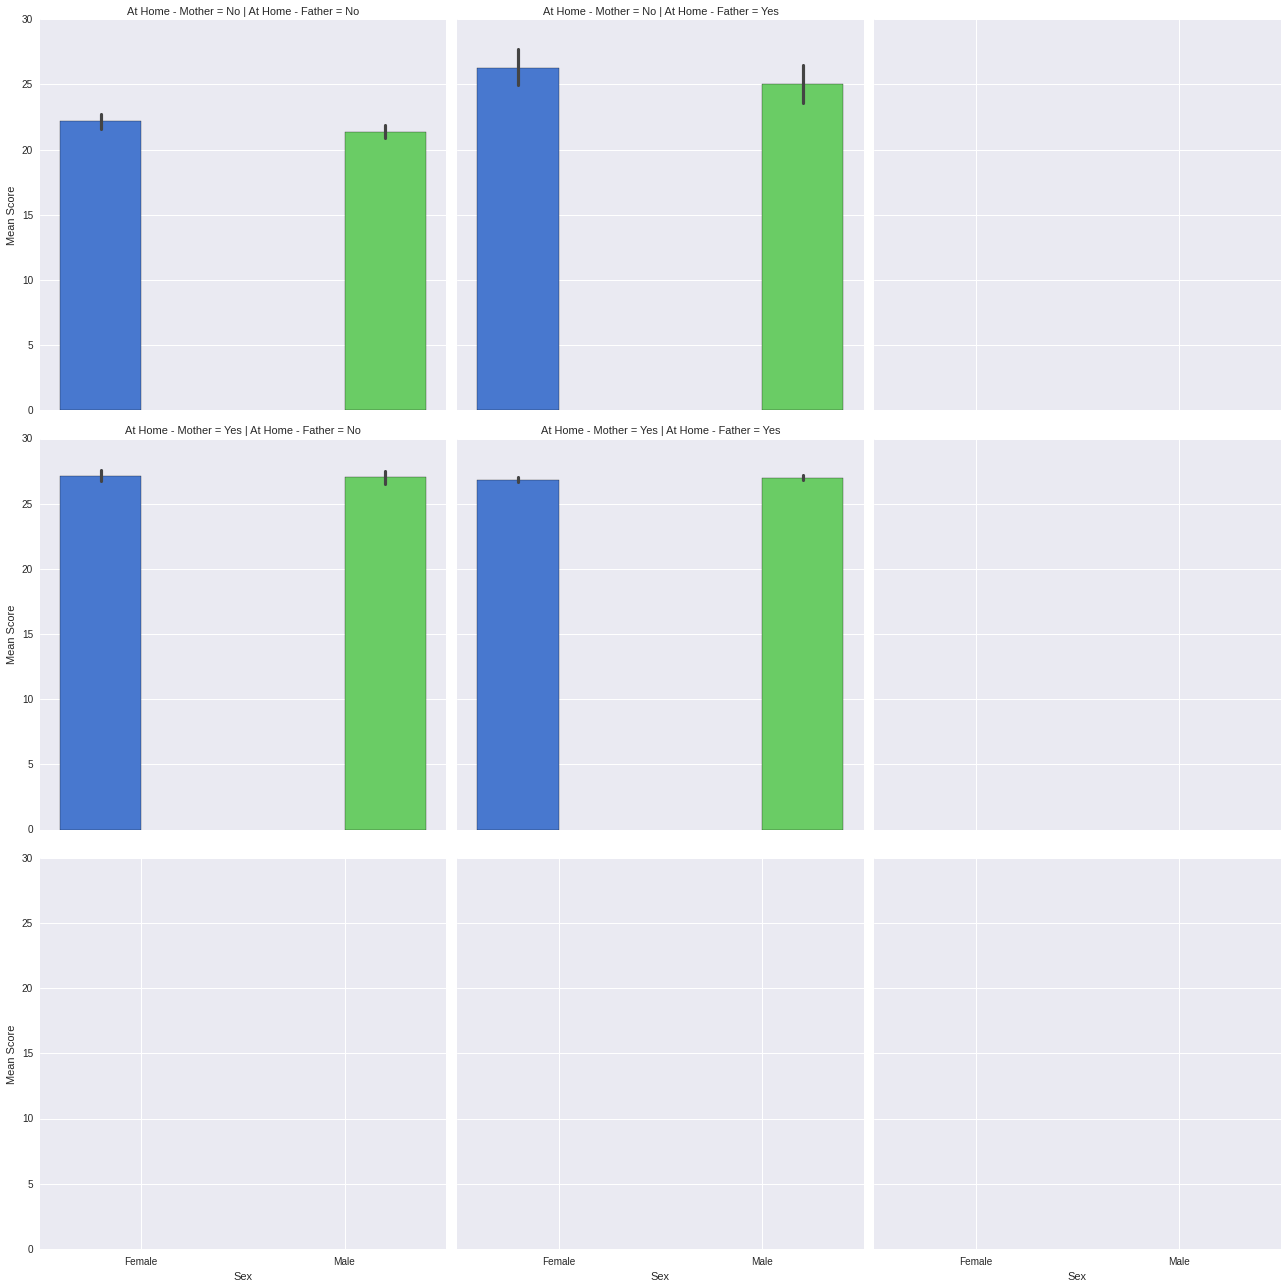

In [15]:
g = sns.factorplot("Sex", "Total Score", "Sex",
                   row="At Home - Mother",
                   col="At Home - Father",
                   data=data, kind="bar",
                   size=6, palette="muted",
                   dropna=True)
g.despine(left=True)
g.set_ylabels("Mean Score")

#Heatmaps

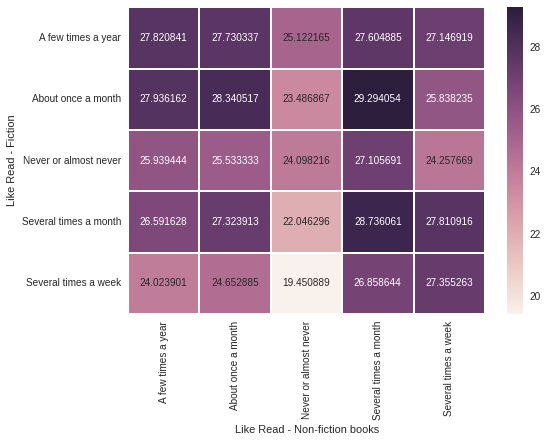

In [29]:
ptable = pd.pivot_table(
    data, 
    values='Total Score', 
    index='Like Read - Fiction', 
    columns='Like Read - Non-fiction books')
sns.heatmap(ptable, annot=True, fmt="f")


###Not very useful if not in order...

###Heatmaps - Round 2
####Effects of variables over a range

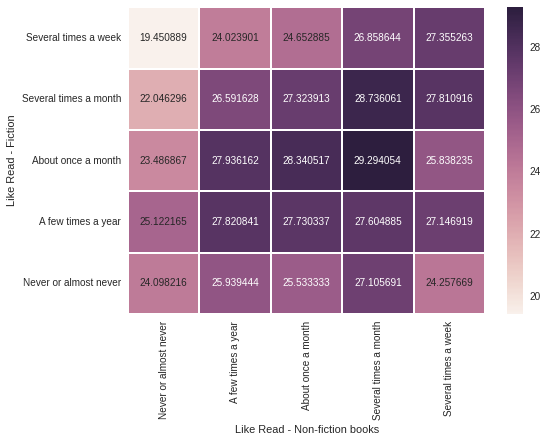

In [30]:
display_order = [
    u'Never or almost never',
    u'A few times a year', 
    u'About once a month',                   
    u'Several times a month', 
    u'Several times a week'
]
display_table = ptable[display_order].reindex(reversed(display_order))
sns.heatmap(display_table,
            annot=True, 
            fmt="f")

###Pivot tables can do other aggregations

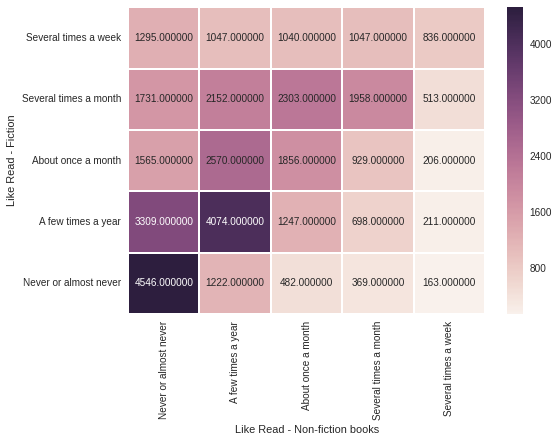

In [46]:
count_table = pd.pivot_table(
    data, 
    values='Total Score', 
    index='Like Read - Fiction', 
    columns='Like Read - Non-fiction books',
    aggfunc=np.count_nonzero)

sns.heatmap(count_table[display_order].reindex(reversed(display_order)), annot=True, fmt="f")

#Scatterplot

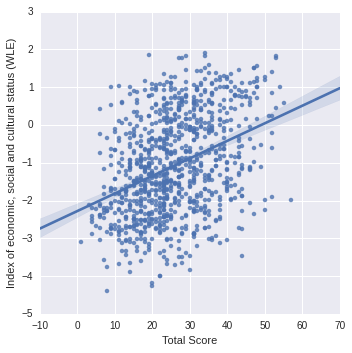

In [17]:
import random
some_sample = random.sample(data.index, 1000)
sns.lmplot("Total Score", 
           'Index of economic, social and cultural status (WLE)', 
           data.ix[some_sample])

Why plot just a subset of the data?

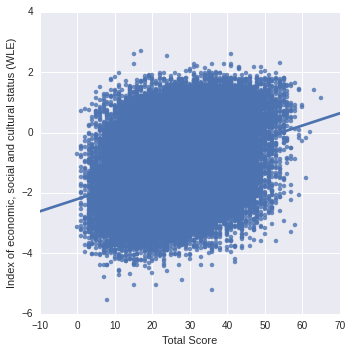

In [18]:
sns.lmplot("Total Score", 
           'Index of economic, social and cultural status (WLE)', 
           data)

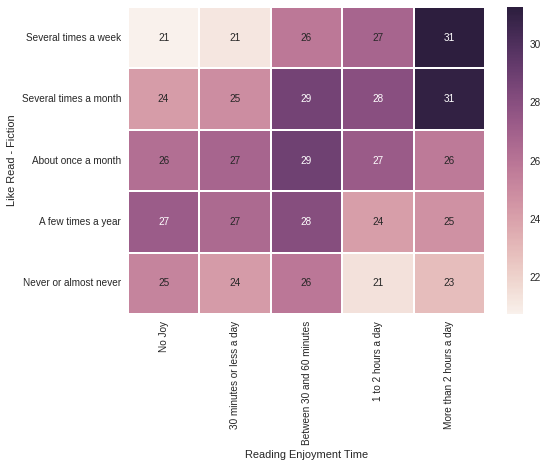

In [19]:
bad_data = data['Reading Enjoyment Time'].apply(lambda x: isinstance(x, basestring) and x.startswith('I don'))
reading_enjoyment = data['Reading Enjoyment Time'].copy()
reading_enjoyment[bad_data] = 'No Joy'

time_x_fiction = pd.pivot_table(
    data, 
    values='Total Score', 
    index='Like Read - Fiction', 
    columns=reading_enjoyment)

col_order = [
    'No Joy', 
    '30 minutes or less a day', 
    'Between 30 and 60 minutes',
    '1 to 2 hours a day',
    'More than 2 hours a day'
]

row_order = [
    'Several times a week',
    'Several times a month',
    'About once a month',
    'A few times a year',
    'Never or almost never',
]

display_table = time_x_fiction[col_order].reindex(row_order)
sns.heatmap(display_table, annot=True)


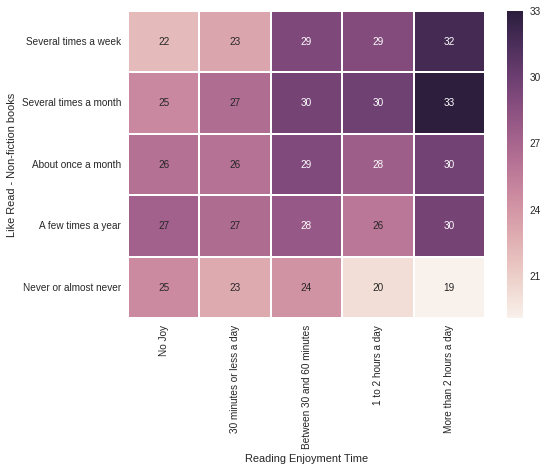

In [20]:
bad_data = data['Reading Enjoyment Time'].apply(lambda x: isinstance(x, basestring) and x.startswith('I don'))
reading_enjoyment = data['Reading Enjoyment Time'].copy()
reading_enjoyment[bad_data] = 'No Joy'

time_x_nonfiction = pd.pivot_table(
    data, 
    values='Total Score', 
    index='Like Read - Non-fiction books', 
    columns=reading_enjoyment)

col_order = [
    'No Joy', 
    '30 minutes or less a day', 
    'Between 30 and 60 minutes',
    '1 to 2 hours a day',
    'More than 2 hours a day'
]

row_order = [
    'Several times a week',
    'Several times a month',
    'About once a month',
    'A few times a year',
    'Never or almost never',
]

non_f_display_table = time_x_nonfiction[col_order].reindex(row_order)
sns.heatmap(non_f_display_table, annot=True)

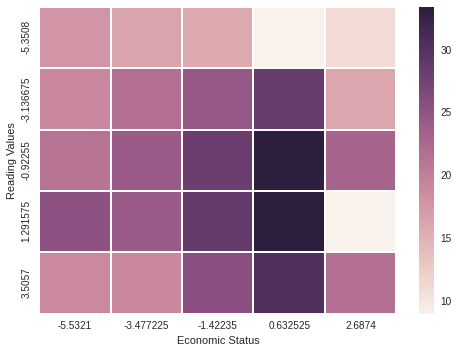

In [45]:
key_reading = 'Online Reading'
key_score = 'Total Score'
key_econ = 'Index of economic, social and cultural status (WLE)'

data_reading = data[key_reading]
data_score = data[key_score]
data_econ = data[key_econ]

reading_bins = np.linspace(np.min(data_reading), np.max(data_reading), 5)
econ_bins = np.linspace(np.min(data_econ), np.max(data_econ), 5)

to_pivot = pd.DataFrame({
    key_reading: np.digitize(data_reading, 
                             bins=reading_bins),
    key_econ: np.digitize(data_econ,
                          bins=econ_bins),
    key_score: data_score
})

ptable = pd.pivot_table(
    to_pivot, 
    values=key_score,
    index=key_reading,
    columns=key_econ,
    aggfunc=np.mean)
ptable.columns = pd.Series(map(str, econ_bins), name='Economic Status')
ptable.index = pd.Series(map(str, reading_bins), name='Reading Values')

sns.heatmap(ptable, annot=False, fmt="f")

#Modeling